In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [8]:
type(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


NoneType

In [9]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [12]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=30)

Epoch 1/30
943/943 [==============================] - 3s 4ms/step - loss: 0.3556 - accuracy: 0.8194 - val_loss: 0.3642 - val_accuracy: 0.8149
Epoch 2/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3552 - accuracy: 0.8205 - val_loss: 0.3643 - val_accuracy: 0.8166
Epoch 3/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3543 - accuracy: 0.8197 - val_loss: 0.3627 - val_accuracy: 0.8168
Epoch 4/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3547 - accuracy: 0.8204 - val_loss: 0.3791 - val_accuracy: 0.8054
Epoch 5/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3694 - accuracy: 0.8128 - val_loss: 0.3739 - val_accuracy: 0.8149
Epoch 6/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3670 - accuracy: 0.8154 - val_loss: 0.3692 - val_accuracy: 0.8122
Epoch 7/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3600 - accuracy: 0.8184 - val_loss: 0.3648 - val_accuracy: 0.8149
Epoch 

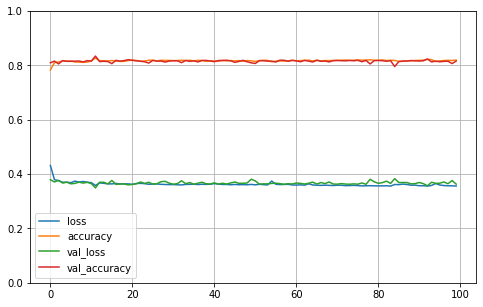

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.8177


[0.3576849400997162, 0.8176626563072205]

In [15]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

0.7543160690571049

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

In [16]:
from sklearn.preprocessing import StandardScaler
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']

In [17]:
import warnings
from sklearn import  metrics
results = []

sigmoid
Epoch 1/50
943/943 [==============================] - 10s 8ms/step - loss: 0.4265 - accuracy: 0.7933 - val_loss: 0.4044 - val_accuracy: 0.7832
Epoch 2/50
943/943 [==============================] - 5s 5ms/step - loss: 0.3778 - accuracy: 0.8108 - val_loss: 0.3664 - val_accuracy: 0.8140
Epoch 3/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3714 - accuracy: 0.8162 - val_loss: 0.3678 - val_accuracy: 0.8199
Epoch 4/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3677 - accuracy: 0.8171 - val_loss: 0.3559 - val_accuracy: 0.8275
Epoch 5/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3558 - accuracy: 0.8299 - val_loss: 0.3606 - val_accuracy: 0.8203
Epoch 6/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3543 - accuracy: 0.8308 - val_loss: 0.3528 - val_accuracy: 0.8330
Epoch 7/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3512 - accuracy: 0.8318 - val_loss: 0.3495 - val_accuracy: 0.83

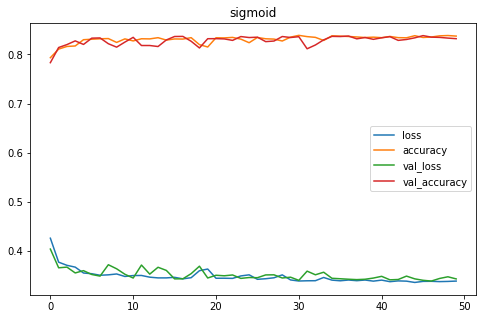

471/471 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8319


0.7543160690571049

In [18]:
act = activation_fun[0]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

tanh
Epoch 1/50
943/943 [==============================] - 8s 7ms/step - loss: 0.4090 - accuracy: 0.7967 - val_loss: 0.3916 - val_accuracy: 0.7909
Epoch 2/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3805 - accuracy: 0.8080 - val_loss: 0.3734 - val_accuracy: 0.8131
Epoch 3/50
943/943 [==============================] - 6s 6ms/step - loss: 0.3744 - accuracy: 0.8133 - val_loss: 0.3740 - val_accuracy: 0.8139
Epoch 4/50
943/943 [==============================] - 6s 6ms/step - loss: 0.3721 - accuracy: 0.8129 - val_loss: 0.3670 - val_accuracy: 0.8163
Epoch 5/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3725 - accuracy: 0.8129 - val_loss: 0.3646 - val_accuracy: 0.8173
Epoch 6/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3692 - accuracy: 0.8140 - val_loss: 0.3767 - val_accuracy: 0.8070
Epoch 7/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3704 - accuracy: 0.8136 - val_loss: 0.3647 - val_accuracy: 0.8195
E

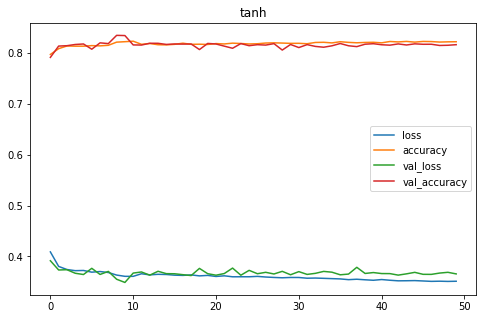

471/471 [==============================] - 1s 2ms/step - loss: 0.3658 - accuracy: 0.8159


0.7543160690571049

In [19]:
act = activation_fun[1]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
results.append(pd.DataFrame(history.history))
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

relu
Epoch 1/50
943/943 [==============================] - 5s 4ms/step - loss: 3.5679 - accuracy: 0.7946 - val_loss: 1.3525 - val_accuracy: 0.7959
Epoch 2/50
943/943 [==============================] - 3s 3ms/step - loss: 1.4473 - accuracy: 0.8114 - val_loss: 0.3816 - val_accuracy: 0.7908
Epoch 3/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3862 - accuracy: 0.7881 - val_loss: 0.3740 - val_accuracy: 0.7934
Epoch 4/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3802 - accuracy: 0.7916 - val_loss: 0.3717 - val_accuracy: 0.7929
Epoch 5/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3776 - accuracy: 0.8117 - val_loss: 0.3709 - val_accuracy: 0.8120
Epoch 6/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3752 - accuracy: 0.8131 - val_loss: 0.3816 - val_accuracy: 0.8104
Epoch 7/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3841 - accuracy: 0.8131 - val_loss: 0.3684 - val_accuracy: 0.8156
E

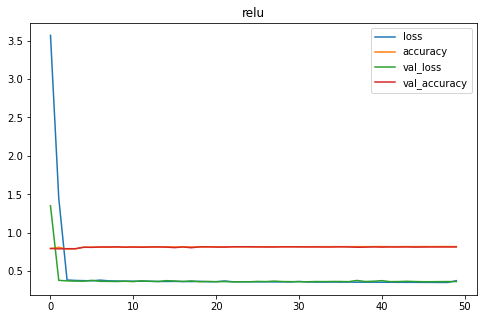

471/471 [==============================] - 1s 3ms/step - loss: 0.3653 - accuracy: 0.8157


0.7543160690571049

In [20]:
act = activation_fun[2]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
results.append(pd.DataFrame(history.history))
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

elu
Epoch 1/50
943/943 [==============================] - 3s 3ms/step - loss: 1.8324 - accuracy: 0.8063 - val_loss: 0.4407 - val_accuracy: 0.8086
Epoch 2/50
943/943 [==============================] - 3s 3ms/step - loss: 0.4323 - accuracy: 0.8168 - val_loss: 0.3757 - val_accuracy: 0.8104
Epoch 3/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3689 - accuracy: 0.8162 - val_loss: 0.3605 - val_accuracy: 0.8243
Epoch 4/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3694 - accuracy: 0.8141 - val_loss: 0.3665 - val_accuracy: 0.8143
Epoch 5/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3667 - accuracy: 0.8154 - val_loss: 0.3721 - val_accuracy: 0.8113
Epoch 6/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3669 - accuracy: 0.8164 - val_loss: 0.3665 - val_accuracy: 0.8138
Epoch 7/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3676 - accuracy: 0.8166 - val_loss: 0.3612 - val_accuracy: 0.8171
Ep

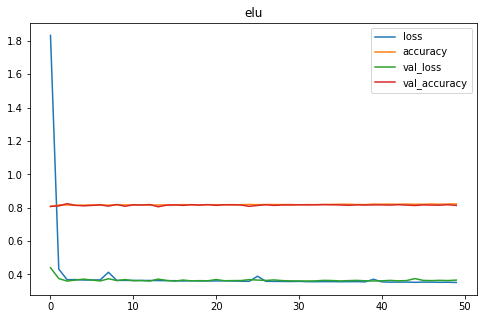

471/471 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8136


0.7543160690571049

In [21]:
act = activation_fun[3]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
results.append(pd.DataFrame(history.history))
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

LeakyReLU
Epoch 1/50
943/943 [==============================] - 4s 3ms/step - loss: 3.5514 - accuracy: 0.7976 - val_loss: 0.6282 - val_accuracy: 0.8045
Epoch 2/50
943/943 [==============================] - 3s 3ms/step - loss: 1.0063 - accuracy: 0.8199 - val_loss: 1.3600 - val_accuracy: 0.8170
Epoch 3/50
943/943 [==============================] - 3s 3ms/step - loss: 0.6090 - accuracy: 0.8226 - val_loss: 0.4972 - val_accuracy: 0.8260
Epoch 4/50
943/943 [==============================] - 3s 3ms/step - loss: 0.8137 - accuracy: 0.8203 - val_loss: 0.4359 - val_accuracy: 0.8196
Epoch 5/50
943/943 [==============================] - 3s 3ms/step - loss: 0.5508 - accuracy: 0.8296 - val_loss: 0.5850 - val_accuracy: 0.8207
Epoch 6/50
943/943 [==============================] - 3s 3ms/step - loss: 0.4269 - accuracy: 0.8300 - val_loss: 0.3378 - val_accuracy: 0.8471
Epoch 7/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3939 - accuracy: 0.8291 - val_loss: 0.5690 - val_accuracy: 0.8

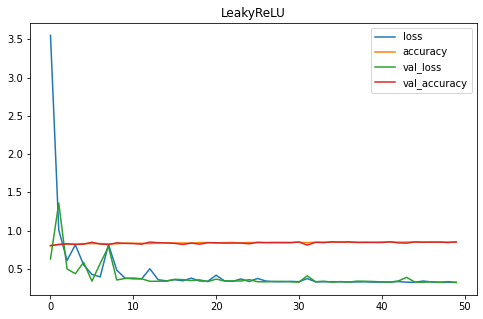

471/471 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.8517


0.7543160690571049

In [22]:
act = activation_fun[4]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
results.append(pd.DataFrame(history.history))
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

# Zad. 
Stwórz wykres porównujący metody. 

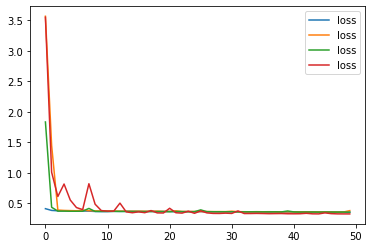

In [23]:
fig, ax = plt.subplots(1,1)
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[0]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[0]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[0]]].plot(label=activation_fun[2],ax=ax)
results[3].loc[:,[keys[0]]].plot(label=activation_fun[3],ax=ax)
plt.show()

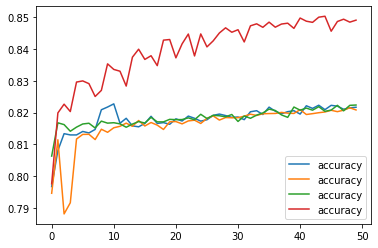

In [24]:
fig, ax = plt.subplots(1,1)
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[1]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[1]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[1]]].plot(label=activation_fun[2],ax=ax)
results[3].loc[:,[keys[1]]].plot(label=activation_fun[3],ax=ax)
# results[4].loc[:,[keys[1]]].plot(label=activation_fun[4],ax=ax)
plt.show()

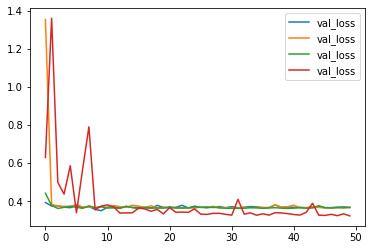

In [25]:
fig, ax = plt.subplots(1,1)
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[2]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[2]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[2]]].plot(label=activation_fun[2],ax=ax)
results[3].loc[:,[keys[2]]].plot(label=activation_fun[3],ax=ax)
# results[4].loc[:,[keys[2]]].plot(label=activation_fun[4],ax=ax)
plt.show()

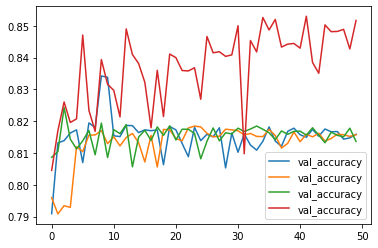

In [26]:
fig, ax = plt.subplots(1,1)
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[3]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[3]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[3]]].plot(label=activation_fun[2],ax=ax)
results[3].loc[:,[keys[3]]].plot(label=activation_fun[3],ax=ax)
# results[4].loc[:,[keys[3]]].plot(label=activation_fun[4],ax=ax)
plt.show()